In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import keras
import datetime
import os

In [5]:
def unix_to_datetime(data, column):
    for i in data[column]:
        dt = datetime.datetime.fromtimestamp(int(i)/1000).strftime('%y-%m-%d %H:%M:%S')
        #print(dt)
   # print(data[column].head())
    data[column] = dt
    return data

def get_bw_train(num_read):
    full_data = pd.read_csv('/home/me/Documents/binance_concat.csv') #bw_data/AIONBTC.csv')
    full_labels = pd.read_csv('/home/me/Documents/binance_sym_labels.csv')
    print(len(full_data), len(full_labels))
    num_read = 3

    data = {}
    norm_close = [0]
    for i in range(1,num_read+1):
        start = (i-1)*2880
        end= i*2880
        print("Adding {} to train data...".format(full_labels["0"].loc[i]))
        curr = full_data[start:end]
        #concat_data["norm close"] = norm_close
        curr["Norm close"] = curr["Close"].divide(curr["Close"].iloc[0]).multiply(100)
        norm_close.append(normalize(curr["Close"].divide(curr["Close"].iloc[0]).multiply(100)))
        data[full_labels["0"].iloc[i]] = curr
    train_data = full_data[:end]
    print(len(train_data), len(norm_close))
    #print(concat_data.columns, int(len(concat_data["Open"]))/2880)
    full_data = None
    train_syms = list(data.keys())

    return train_data, train_syms

def get_one():
    full_data = pd.read_csv('/home/me/Documents/binance_concat.csv') #bw_data/AIONBTC.csv')
    full_labels = pd.read_csv('/home/me/Documents/binance_sym_labels.csv')
    data = full_data[:2879]
    full_data = None
    label = full_labels["0"].iloc[0]
    return data, label
    
    

In [6]:
#data, label = get_one()

In [7]:
data = pd.read_csv('/home/me/Documents/BWA/data/bw_data/AIONBTC1.csv')
#print(data.columns)
def split_bw(data):
    try:
        #data = unix_to_datetime(data,'Open time')
        #data = unix_to_datetime(data,'Close time')
        train_data = data[0:1439]
        train_data["Norm close"] = train_data["Close"].divide(train_data["Close"].iloc[0]).multiply(100)
        test_data = data[1440:]
        test_data["Norm close"] = test_data["Close"].divide(test_data["Close"].iloc[0]).multiply(100)
        #print(data.head())
    except Exception as e:
        print(e)
    return train_data, test_data
train_data, test_data = split_bw(data)

/home/me/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/me/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


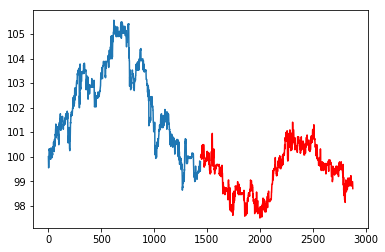

In [8]:
plt.plot(train_data["Norm close"], label="1d before")
plt.plot(test_data["Norm close"], color="red")

In [9]:
bw_folder = '/home/me/Documents/BWA/data/bw_data/'

ct = 0
pre, post = [],[]
labels = []
for i in os.listdir(bw_folder):
    data = pd.read_csv(bw_folder+i)
    train, test = split_bw(data)
    pre.append(train)
    post.append(test)
    i = i.replace(".csv","")
    #print(i)
    labels.append(i)
    ct+=1
    #if(ct==10):
        #break
print(len(pre))
    

/home/me/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/me/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


10


In [10]:
pre_close = {}
post_close = {}
for i in range(len(pre)):
    sym = labels[i]
    pre_close[sym] = pre[i].Close
    post_close[sym] = post[i].Close
    
    
pre_concat = pd.DataFrame(pre_close)
pre_concat = pre_concat.divide(pre_concat.iloc[0])
post_concat = pd.DataFrame(post_close)
post_concat = post_concat.divide(post_concat.iloc[0])
#print(pre_concat.head(),"\n")
#print(pre_concat.tail())
pre_concat.describe()   


,APPCBTC1,APPCBTC2,BTGBTC2,ENGBTC3,NAVBTC6,ONTBTC1,STRATBTC2,STRATBTC4,TUSDBTC3,WABIBTC1
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000
mean,0.991618,0.982718,1.004840,1.021559,1.009335,0.986057,1.042932,1.037215,1.000428,1.033192
std,0.022616,0.020385,0.007180,0.007975,0.009243,0.012874,0.020729,0.018663,0.003732,0.027137
min,0.934143,0.934687,0.995040,0.999307,0.993827,0.959052,0.999825,0.998613,0.992104,0.983383
25%,0.981138,0.966240,1.000118,1.015943,1.001543,0.974422,1.020658,1.017340,0.997517,1.009320
50%,0.992967,0.984996,1.002362,1.020476,1.009259,0.988544,1.052171,1.043870,1.000127,1.028973
75%,1.003197,1.000110,1.006495,1.027008,1.015432,0.995463,1.057598,1.050806,1.003375,1.061461
max,1.042839,1.019417,1.028106,1.046017,1.046296,1.015767,1.076506,1.066239,1.010506,1.091287


In [8]:
post_concat.describe()

,AEBTC1,AEBTC2,AEBTC3,AIONBTC1,AIONBTC2,AIONBTC3,AIONBTC4,AMBBTC1,APPCBTC1,APPCBTC2,...,XRPBTC1,ZENBTC1,ZENBTC2,ZENBTC3,ZENBTC4,ZILBTC1,ZILBTC2,ZILBTC3,ZILBTC4,ZRXBTC1
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,...,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,0.972255,0.989787,1.009135,0.993583,0.989864,0.997143,1.015774,0.985178,0.965812,0.980860,...,0.980834,0.973034,1.137859,0.988305,1.123179,0.991820,0.991661,0.989893,0.994017,0.987701
std,0.006409,0.008452,0.006803,0.009263,0.009288,0.009302,0.010856,0.022962,0.014284,0.014202,...,0.008890,0.010698,0.060922,0.009245,0.047499,0.008053,0.008037,0.007956,0.008049,0.011263
min,0.953365,0.966824,0.988084,0.975035,0.970599,0.978131,0.986691,0.958041,0.945197,0.947127,...,0.964963,0.945205,0.999065,0.962019,1.000000,0.972443,0.972443,0.971254,0.974233,0.964690
25%,0.968929,0.982588,1.003972,0.985935,0.981799,0.989065,1.010791,0.969360,0.955835,0.970942,...,0.971004,0.965222,1.087637,0.981250,1.096193,0.985915,0.985915,0.983486,0.987730,0.979676
50%,0.972433,0.990588,1.010280,0.994726,0.991600,0.998589,1.017626,0.977752,0.962282,0.978370,...,0.982723,0.973547,1.148867,0.989904,1.125028,0.989590,0.989590,0.987768,0.992025,0.986845
75%,0.975419,0.996706,1.014252,1.000703,0.996850,1.003880,1.022302,0.993365,0.973001,0.991042,...,0.987556,0.979688,1.179014,0.995192,1.161748,0.999388,0.999388,0.996330,1.001380,0.995514
max,1.001608,1.009176,1.022664,1.014065,1.009450,1.017284,1.037410,1.105386,1.008382,1.013983,...,1.000725,1.005668,1.269222,1.007933,1.223474,1.009186,1.009186,1.007951,1.011043,1.019271


In [12]:
def corr_data(base,data):
    new_data = {}
    for c,i in enumerate(data.columns):
        if(c==len(data.columns)-1):
            print(c)
            break
        cc = base.corr(data.ix[:,c+1])
        
        if(cc>.6):
            #print("adding {} to dataset corr: {}".format(i,cc))
            new_data[i]= data.ix[:,c+1]
    return new_data
for i in pre_concat:
    base = pre_concat[i]
    print(len(base))
    #or 1440 len minute price data as base
    corr_set = corr_data(base, pre_concat)
    corr_df = pd.DataFrame(corr_set)
    print(corr_df.info())
    corr_loc = '/home/me/Documents/BWA/data/corr_data/'
    corr_df.to_csv(corr_loc + i+".csv")
    print(corr_df.columns)
    #print(pre_concat["APPCBTC1"].head())

1439
9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 3 columns):
BTGBTC2      1439 non-null float64
ONTBTC1      1439 non-null float64
STRATBTC2    1439 non-null float64
dtypes: float64(3)
memory usage: 33.8 KB
None


In [11]:
len(os.listdir(bw_folder))

218